<h1>Initialize</h1>

<b>Import libraries and set working directory</b>

In [6]:
import numpy as np
import os
import pandas as pd
from arcpy import env
from arcpy import TableToTable_conversion

In [7]:
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')
dirResults = os.path.join(dirWork, r'results')
dirLookups = os.path.join(dirWork, r'lookups')

print("Working Directory: " + dirWork)
print("Data Directory: " + dirData)
print("Results Directory: " + dirResults)
print("Lookups Directory: " + dirLookups)

Working Directory: E:\GitHub\UTA-Changes-Ridership-Compare
Data Directory: E:\GitHub\UTA-Changes-Ridership-Compare\data
Results Directory: E:\GitHub\UTA-Changes-Ridership-Compare\results
Lookups Directory: E:\GitHub\UTA-Changes-Ridership-Compare\lookups


In [8]:
#define variables

dbf_TDMRoute1 = os.path.join(dirData, r'TDM1\_v831_SE19_Net19_2_Route.dbf')
dbf_TDMRoute2 = os.path.join(dirData, r'TDM2\_v831_SE19_Net19_2_Route.dbf')

csv_TDMRoute1 = os.path.join(dirResults, r'TDMRoute1.csv')
csv_TDMRoute2 = os.path.join(dirResults, r'TDMRoute2.csv')

In [9]:
#define lookups
csv_RouteInfo = os.path.join(dirLookups, r'RouteInfo.csv')

<h1>TDM Data </h1>

<b>Open Route DBF from TDM and Convert to CSV</b>

In [10]:
# Create function that converts dbfs to csvs using arcpy
def dbfToCSV(dbf, csv):
    TableToTable_conversion(dbf, os.path.dirname(csv), os.path.basename(csv))

# Allow arcpy to overwrite output files
env.overwriteOutput = True

# convert dbfs to csvs
dbfToCSV(dbf_TDMRoute1, csv_TDMRoute1)
dbfToCSV(dbf_TDMRoute2, csv_TDMRoute2)

<b>Read in CSV and do some initial data checks</b>

In [11]:
df_TDMRoute1 = pd.read_csv(csv_TDMRoute1)
df_TDMRoute2 = pd.read_csv(csv_TDMRoute2)

In [12]:
# Show number of rows and columns
nRowsTDM = df_TDMRoute1.shape[0]
nColumnsTDM = df_TDMRoute1.shape[1]
print("TDM Route 1: there are {} rows and {} columns".format(nRowsTDM, nColumnsTDM))

# Show number of rows and columns
nRowsTDM = df_TDMRoute2.shape[0]
nColumnsTDM = df_TDMRoute2.shape[1]
print("TDM Route 2: there are {} rows and {} columns".format(nRowsTDM, nColumnsTDM))

TDM Route 1: there are 109 rows and 36 columns
TDM Route 2: there are 110 rows and 36 columns


<i>Initial look at data</i>

In [13]:
df_TDMRoute1[['NAME','DY_BOARD']]

,NAME,DY_BOARD
0,D460,154.389999
1,D461,349.269989
2,D462,114.440002
3,FD605,346.119995
4,M805_Santaquin,406.290008
...,...,...
104,Green,18260.259766
105,Red,25033.839844
106,Sline,879.030029
107,RCRT_OGPN,23999.800781


In [14]:
df_TDMRoute2

,OID_,MODE,NAMEID,NAME,OPERATOR,ONEWAY,RT_DIST,PK_PRD,OK_PRD,PK_HEADWAY,...,DY_ALIGHT,PK_VEH,OK_VEH,DY_VEH,PK_REVMI,OK_REVMI,DY_REVMI,PK_REVHR,OK_REVHR,DY_REVHR
0,NaN,4,1.0,D460,0.0,1,24.400000,6,10,60,...,142.000000,2.0,0.0,2.0,146.399994,0.000000,146.399994,12.0,0.0,12.0
1,NaN,4,2.0,D461,0.0,1,38.740002,6,10,30,...,346.540008,5.0,0.0,5.0,464.880005,0.000000,464.880005,30.0,0.0,30.0
2,NaN,4,3.0,D462,0.0,1,23.440001,6,10,40,...,122.160004,3.0,0.0,3.0,210.960007,0.000000,210.960007,18.0,0.0,18.0
3,NaN,4,4.0,FD605,0.0,0,15.960000,6,10,30,...,373.339996,2.0,2.0,2.0,191.520004,319.200012,510.720001,12.0,20.0,32.0
4,NaN,4,5.0,M805_Santaquin,0.0,1,61.169998,6,10,30,...,632.440002,4.0,0.0,4.0,734.039978,0.000000,734.039978,24.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,7,106.0,Red,0.0,0,46.500000,6,10,15,...,27916.869141,8.0,8.0,8.0,1116.000000,1860.000000,2976.000000,48.0,80.0,128.0
106,NaN,7,107.0,Sline,0.0,0,3.520000,6,10,15,...,672.760010,2.0,2.0,2.0,84.480003,140.800003,225.279999,12.0,20.0,32.0
107,NaN,8,108.0,OGPNShuttle,0.0,0,12.320000,6,10,360,...,346.209992,1.0,0.0,1.0,12.320000,0.000000,12.320000,6.0,0.0,6.0
108,NaN,8,109.0,RCRT_OGPN,0.0,0,162.199997,6,10,30,...,24637.599609,8.0,4.0,8.0,1946.400024,1622.000000,3568.399902,48.0,40.0,88.0


In [15]:
df_TDMRoute2.columns

Index(['OID_', 'MODE', 'NAMEID', 'NAME', 'OPERATOR', 'ONEWAY', 'RT_DIST',
       'PK_PRD', 'OK_PRD', 'PK_HEADWAY', 'OK_HEADWAY', 'PK_RT_TIME',
       'OK_RT_TIME', 'PK_SPEED', 'OK_SPEED', 'PK_D_BOARD', 'PK_W_BOARD',
       'PK_BOARD', 'PK_ALIGHT', 'OK_D_BOARD', 'OK_W_BOARD', 'OK_BOARD',
       'OK_ALIGHT', 'DY_D_BOARD', 'DY_W_BOARD', 'DY_BOARD', 'DY_ALIGHT',
       'PK_VEH', 'OK_VEH', 'DY_VEH', 'PK_REVMI', 'OK_REVMI', 'DY_REVMI',
       'PK_REVHR', 'OK_REVHR', 'DY_REVHR'],
      dtype='object')

In [16]:
df_CompareTDMRoute1M2 = pd.DataFrame.merge(df_TDMRoute1[['NAME','DY_BOARD','DY_W_BOARD','DY_D_BOARD','OK_SPEED']].rename({'NAME': 'TDM_Name', 'DY_BOARD': 'DY_BOARD_1', 'DY_W_BOARD': 'DY_W_BOARD_1', 'DY_D_BOARD': 'DY_D_BOARD_1', 'OK_SPEED': 'OK_SPEED_1'}, axis='columns'), df_TDMRoute2[['NAME','DY_BOARD','DY_W_BOARD','DY_D_BOARD','OK_SPEED']].rename({'NAME': 'TDM_Name', 'DY_BOARD': 'DY_BOARD_2', 'DY_W_BOARD': 'DY_W_BOARD_2', 'DY_D_BOARD': 'DY_D_BOARD_2', 'OK_SPEED': 'OK_SPEED_2'}, axis='columns'), on="TDM_Name", how="outer")

In [17]:
df_CompareTDMRoute1M2['DY_BOARD_Diff'] = df_CompareTDMRoute1M2['DY_BOARD_1'] - df_CompareTDMRoute1M2['DY_BOARD_2']
df_CompareTDMRoute1M2['DY_W_BOARD_Diff'] = df_CompareTDMRoute1M2['DY_W_BOARD_1'] - df_CompareTDMRoute1M2['DY_W_BOARD_2']
df_CompareTDMRoute1M2['DY_D_BOARD_Diff'] = df_CompareTDMRoute1M2['DY_D_BOARD_1'] - df_CompareTDMRoute1M2['DY_D_BOARD_2']
df_CompareTDMRoute1M2['OK_SPEED_Diff'] = df_CompareTDMRoute1M2['OK_SPEED_1'] - df_CompareTDMRoute1M2['OK_SPEED_2']

In [18]:
df_CompareTDMRoute1M2

,TDM_Name,DY_BOARD_1,DY_W_BOARD_1,DY_D_BOARD_1,OK_SPEED_1,DY_BOARD_2,DY_W_BOARD_2,DY_D_BOARD_2,OK_SPEED_2,DY_BOARD_Diff,DY_W_BOARD_Diff,DY_D_BOARD_Diff,OK_SPEED_Diff
0,D460,154.389999,124.510002,29.879999,17.900000,142.000000,116.699997,25.299999,17.900000,12.389999,7.810005,4.580000,0.000000
1,D461,349.269989,333.959992,15.310000,18.100000,346.540008,327.750000,18.790001,18.100000,2.729981,6.209992,-3.480000,0.000000
2,D462,114.440002,114.070000,0.370000,18.799999,122.160004,121.629997,0.530000,18.799999,-7.720001,-7.559998,-0.160000,0.000000
3,FD605,346.119995,328.339996,17.780001,17.100000,373.339996,351.299988,22.040001,17.100000,-27.220001,-22.959992,-4.260000,0.000000
4,M805_Santaquin,406.290008,329.190002,77.099998,41.700001,632.440002,432.869995,199.570007,41.900002,-226.149994,-103.679993,-122.470009,-0.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Red,25033.839844,22113.669922,2920.169922,23.600000,27916.869141,24597.380859,3319.489990,24.400000,-2883.029297,-2483.710938,-399.320068,-0.799999
106,Sline,879.030029,869.380005,9.650000,11.800000,672.760010,672.219971,0.540000,13.800000,206.270019,197.160034,9.110000,-2.000000
107,RCRT_OGPN,23999.800781,14913.120117,9086.679688,40.599998,24637.599609,15607.959961,9029.639648,40.599998,-637.798828,-694.839844,57.040039,0.000000
108,BRT_ProOrm,13327.419922,13009.790039,317.630005,16.799999,14575.450195,14290.570312,284.880005,16.200001,-1248.030273,-1280.780273,32.750000,0.599998


<b>Use Lookup to get to Route Info</b>

<i>Read in Route Info csv</i>

In [19]:
df_RouteInfo = pd.read_csv(csv_RouteInfo)

In [20]:
df_RouteInfo

,TDM_Name,Route_Num,Route_Label,Mode,Mode_Name,Service_District
0,S2,2,002,4,Local Bus,Salt Lake
1,S3,3,003,4,Local Bus,Salt Lake
2,S4,4,004,4,Local Bus,Salt Lake
3,S6,6,006,4,Local Bus,Salt Lake
4,S9,9,009,4,Local Bus,Salt Lake
...,...,...,...,...,...,...
107,OGPNShuttle,750s,FrontRunner to Pleasant View,8,CRT,Salt Lake
108,Green,704,TRAX-Green,7,LRT,Salt Lake
109,Red,703,TRAX-Red,7,LRT,Salt Lake
110,Sline,720,S-Line,7,LRT,Salt Lake


<i>Join to Lookup to add Route_Label field</i>

In [21]:
df_CompareTDMRoute1M2_Labels = pd.DataFrame.merge(df_CompareTDMRoute1M2, df_RouteInfo, on="TDM_Name", how="inner")

In [22]:
df_CompareTDMRoute1M2_Labels

,TDM_Name,DY_BOARD_1,DY_W_BOARD_1,DY_D_BOARD_1,OK_SPEED_1,DY_BOARD_2,DY_W_BOARD_2,DY_D_BOARD_2,OK_SPEED_2,DY_BOARD_Diff,DY_W_BOARD_Diff,DY_D_BOARD_Diff,OK_SPEED_Diff,Route_Num,Route_Label,Mode,Mode_Name,Service_District
0,D460,154.389999,124.510002,29.879999,17.900000,142.000000,116.699997,25.299999,17.900000,12.389999,7.810005,4.580000,0.000000,460,460,4,Local Bus,Salt Lake
1,D461,349.269989,333.959992,15.310000,18.100000,346.540008,327.750000,18.790001,18.100000,2.729981,6.209992,-3.480000,0.000000,461,461,4,Local Bus,Salt Lake
2,D462,114.440002,114.070000,0.370000,18.799999,122.160004,121.629997,0.530000,18.799999,-7.720001,-7.559998,-0.160000,0.000000,462,462,4,Local Bus,Salt Lake
3,FD605,346.119995,328.339996,17.780001,17.100000,373.339996,351.299988,22.040001,17.100000,-27.220001,-22.959992,-4.260000,0.000000,605,F605,4,Local Bus,Ogden
4,M805_Santaquin,406.290008,329.190002,77.099998,41.700001,632.440002,432.869995,199.570007,41.900002,-226.149994,-103.679993,-122.470009,-0.200001,805,805,4,Local Bus,Provo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Red,25033.839844,22113.669922,2920.169922,23.600000,27916.869141,24597.380859,3319.489990,24.400000,-2883.029297,-2483.710938,-399.320068,-0.799999,703,TRAX-Red,7,LRT,Salt Lake
106,Sline,879.030029,869.380005,9.650000,11.800000,672.760010,672.219971,0.540000,13.800000,206.270019,197.160034,9.110000,-2.000000,720,S-Line,7,LRT,Salt Lake
107,RCRT_OGPN,23999.800781,14913.120117,9086.679688,40.599998,24637.599609,15607.959961,9029.639648,40.599998,-637.798828,-694.839844,57.040039,0.000000,750,FrontRunner,8,CRT,Salt Lake
108,BRT_ProOrm,13327.419922,13009.790039,317.630005,16.799999,14575.450195,14290.570312,284.880005,16.200001,-1248.030273,-1280.780273,32.750000,0.599998,830,UVX,9,BRT III,Provo


<b>Chart TDM Boardings by Route_Label as initial look before OBS comparison</b>

In [23]:
df_Compare = df_CompareTDMRoute1M2_Labels.set_index(["Route_Label"])

In [24]:
df_Compare.sort_index(inplace=True)
df_Compare

,TDM_Name,DY_BOARD_1,DY_W_BOARD_1,DY_D_BOARD_1,OK_SPEED_1,DY_BOARD_2,DY_W_BOARD_2,DY_D_BOARD_2,OK_SPEED_2,DY_BOARD_Diff,DY_W_BOARD_Diff,DY_D_BOARD_Diff,OK_SPEED_Diff,Route_Num,Mode,Mode_Name,Service_District
Route_Label,,,,,,,,,,,,,,,,,
002,S2,5312.379883,3874.370117,1438.010010,13.700000,5220.430176,3852.149902,1368.280029,13.700000,91.949707,22.220215,69.729981,0.000000,2,4,Local Bus,Salt Lake
002X,S2X,80.599998,65.040001,15.560000,13.900000,340.049988,231.339996,108.709999,13.800000,-259.449989,-166.299995,-93.149999,0.099999,2X,6,Express Bus,Salt Lake
003,S3,953.419983,800.450012,152.970001,14.800000,1449.619995,1225.219971,224.399994,14.800000,-496.200012,-424.769958,-71.429993,0.000000,3,4,Local Bus,Salt Lake
004,S4,2003.150024,1952.239990,50.910000,17.700001,2168.530029,2117.189941,51.340000,17.400000,-165.380005,-164.949951,-0.430000,0.300001,4,4,Local Bus,Salt Lake
006,S6,1630.290039,1361.829956,268.459992,14.800000,1510.949951,1246.650024,264.299988,14.800000,119.340088,115.179932,4.160004,0.000000,6,4,Local Bus,Salt Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S-Line,Sline,879.030029,869.380005,9.650000,11.800000,672.760010,672.219971,0.540000,13.800000,206.270019,197.160034,9.110000,-2.000000,720,7,LRT,Salt Lake
TRAX-Blue,Blue,16681.279297,14344.339844,2336.939941,22.400000,18669.810547,15983.240234,2686.570068,24.400000,-1988.531250,-1638.900391,-349.630127,-2.000000,701,7,LRT,Salt Lake
TRAX-Green,Green,18260.259766,17032.849609,1227.410034,18.600000,18109.289062,16981.619141,1127.670044,19.200001,150.970703,51.230469,99.739990,-0.600000,704,7,LRT,Salt Lake


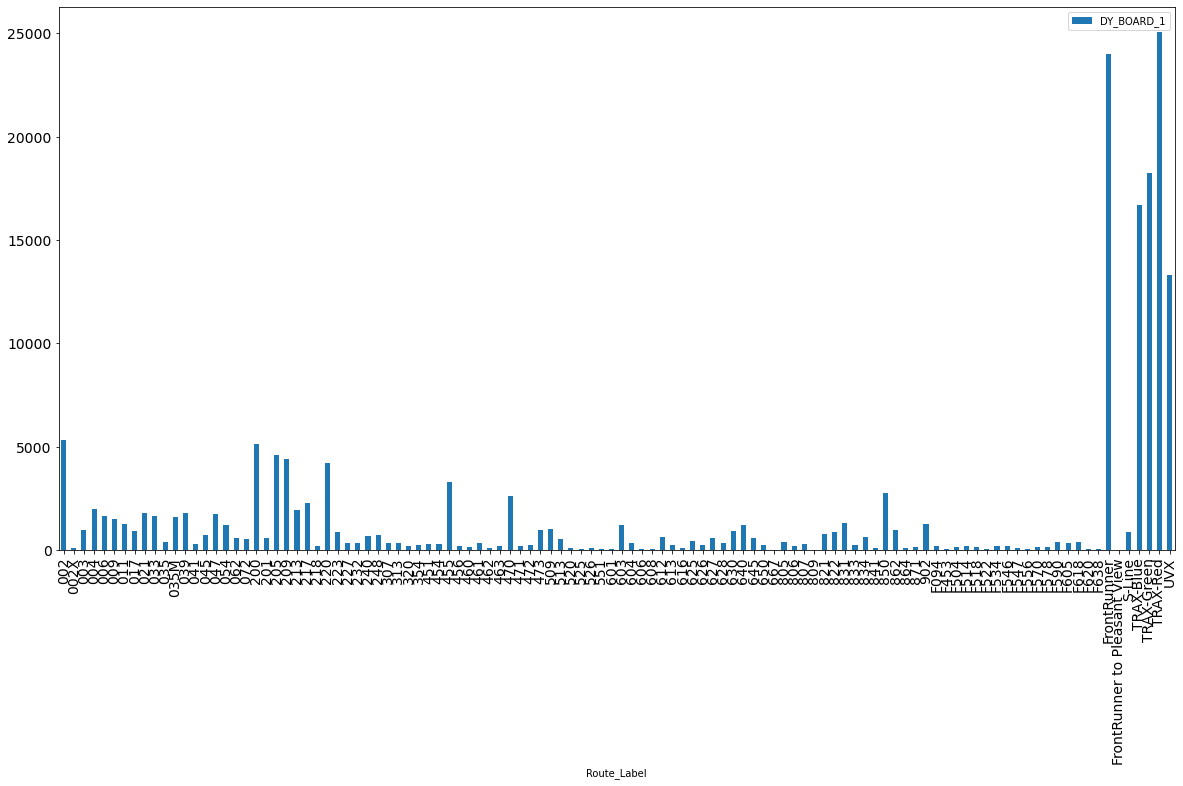

In [25]:
df_Compare.plot.bar(y=('DY_BOARD_1'), figsize=(20,10), fontsize=14)

# Compare TDM1 vs TDM2

In [26]:
import matplotlib.ticker as mtick
from IPython.display import display, Markdown

In [27]:
#chart globals

sLegend1 = "Before Updates"
sLegend2 = "After Updates"
sLegendDiff = "Difference"
sLegendPercentDiff = "% Difference"

sColor1 = "#b8880f"
sColor2 = "#00516f"

sTitle = "Daily Boardings"
sTitleShare = "Daily Boardings Share"

aFigureSize = (20,10)
iTitleSize = 36
iLegendSize = 18
iAxisItemSize = 18
iAxisTitleSize = 24

# Compare Daily Boardings TDM1 vs TDM2

In [28]:
sField1 = "DY_BOARD_2"
sField2 = "DY_BOARD_1"
sFieldDiff = "DY_BOARD_Diff"

In [29]:
df_Compare_Mode = df_Compare.groupby(['Mode_Name']).agg({sField1: [np.sum], sField2: [np.sum], sFieldDiff: [np.sum]})

#rename columns
df_Compare_Mode.columns = (sLegend1, sLegend2, sLegendDiff)

#add total row
df_Compare_Mode_wTotal = df_Compare_Mode.append(df_Compare_Mode.sum(numeric_only=True).rename('Total'))
df_Compare_Mode_wTotal.index.name = 'Mode'

#add percent diff
df_Compare_Mode_wTotal[sLegendPercentDiff] = df_Compare_Mode_wTotal[sLegendDiff] / df_Compare_Mode_wTotal[sLegend1]

#add title 
display(Markdown('# Boardings by Mode'))

df_Compare_Mode_wTotal.style.format({sLegend1: "{:,.0f}",sLegend2: "{:,.0f}",sLegendDiff: "{:,.0f}",sLegendPercentDiff: "{:.1%}"})


# Boardings by Mode

,Before Updates,After Updates,Difference,% Difference
Mode,,,,
BRT I,"1,757","1,597",-160,-9.1%
BRT III,"14,575","13,327","-1,248",-8.6%
CRT,"24,984","24,000",-638,-2.6%
Express Bus,"3,569","3,542",-27,-0.7%
LRT,"65,369","60,854","-4,514",-6.9%
Local Bus,"82,610","79,648","-2,962",-3.6%
Total,"192,863","182,968","-9,549",-5.0%


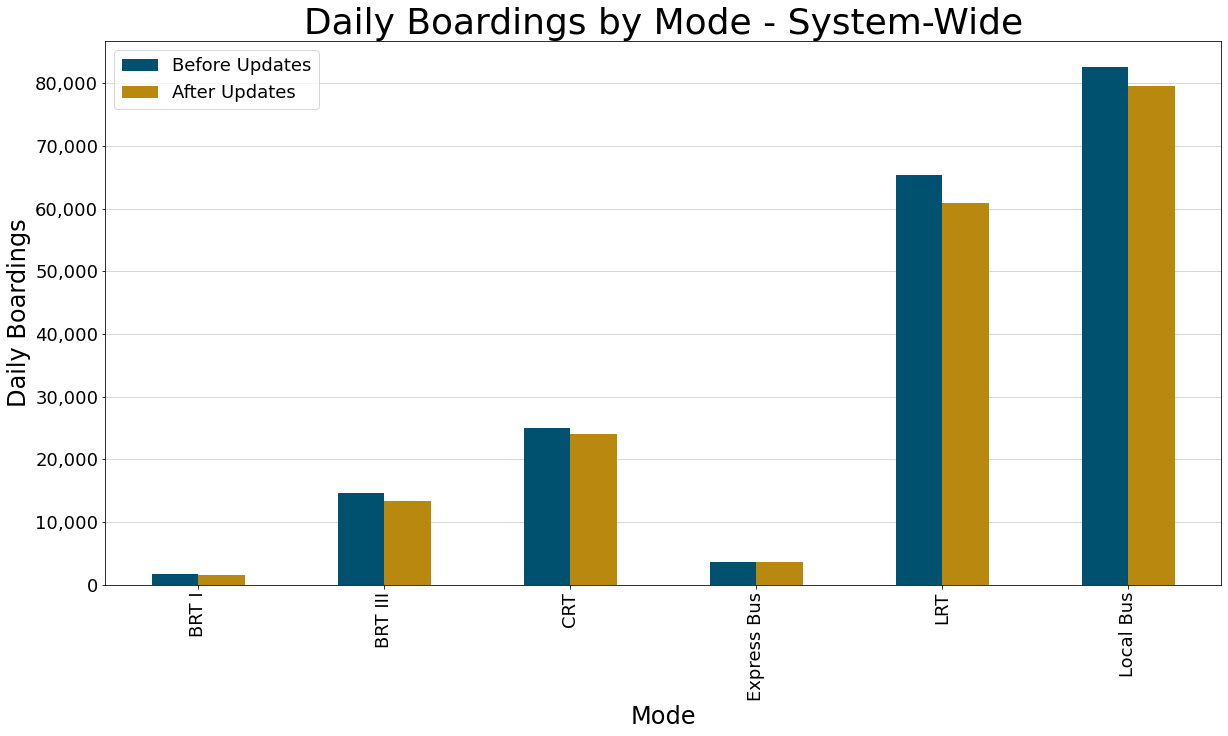

In [30]:
#filter dataframe to plot
df_plot = df_Compare_Mode[[sLegend1,sLegend2]]

ax = df_plot.plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Mode", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sTitle + " by Mode - System-Wide", fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#ax.set_ylim([0, 30000])

In [31]:
df_Compare_ServiceDistrict = df_Compare.groupby(['Service_District']).agg({sField1: [np.sum], sField2: [np.sum], sFieldDiff: [np.sum]})

#rename columns
df_Compare_ServiceDistrict.columns = (sLegend1, sLegend2, sLegendDiff)

#add total row
df_Compare_ServiceDistrict_wTotal = df_Compare_ServiceDistrict.append(df_Compare_ServiceDistrict.sum().rename('Total'))

df_Compare_ServiceDistrict_wTotal[sLegendPercentDiff] = df_Compare_ServiceDistrict_wTotal[sLegendDiff] / df_Compare_ServiceDistrict_wTotal[sLegend1]

#add title 
display(Markdown('# Boardings by Service District'))

df_Compare_ServiceDistrict_wTotal.style.format({sLegend1: "{:,.0f}",sLegend2: "{:,.0f}",sLegendDiff: "{:,.0f}",sLegendPercentDiff: "{:.1%}"})

# Boardings by Service District

,Before Updates,After Updates,Difference,% Difference
Service_District,,,,
Ogden,15,21,6,39.8%
Ogden,"14,884","14,163",-721,-4.8%
Provo,"23,889","22,153","-1,737",-7.3%
Salt Lake,"154,075","146,631","-7,097",-4.6%
Total,"192,863","182,968","-9,549",-5.0%


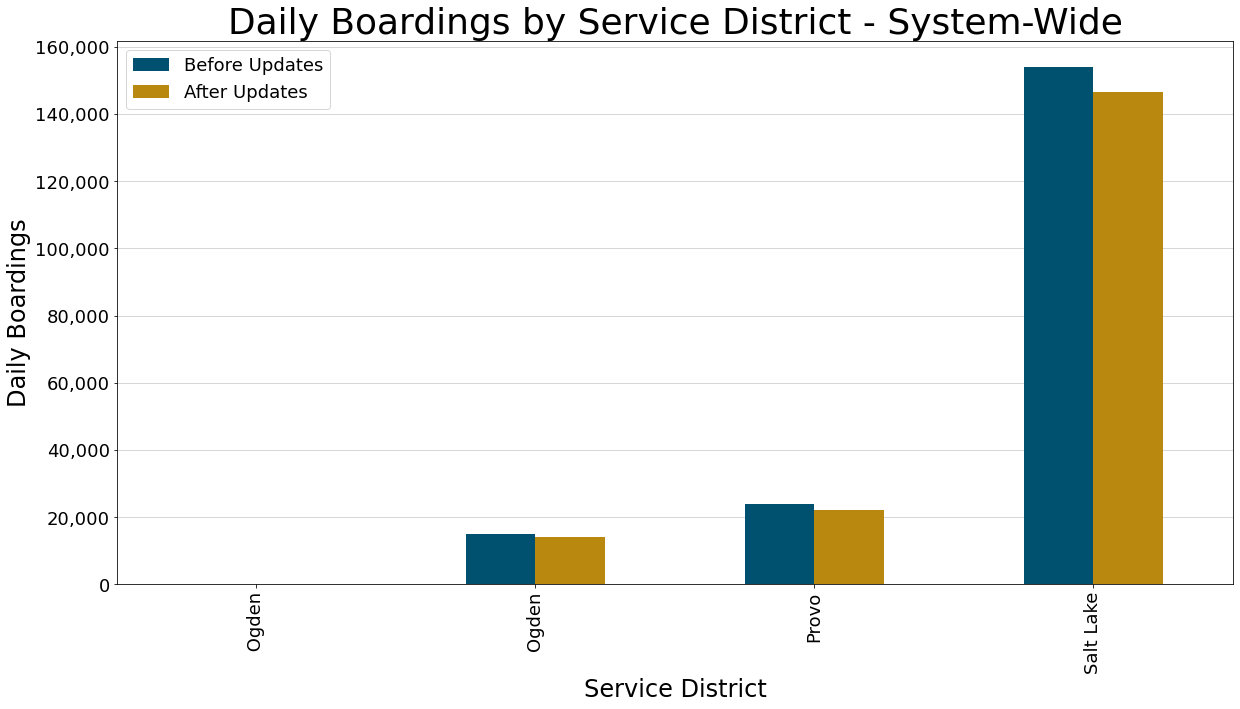

In [32]:
#filter dataframe to plot
df_plot = df_Compare_ServiceDistrict[[sLegend1,sLegend2]]

ax = df_plot.plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Service District", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sTitle + " by Service District - System-Wide", fontsize=iTitleSize)

ax.legend([sLegend1,sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#ax.set_ylim([0, 30000])

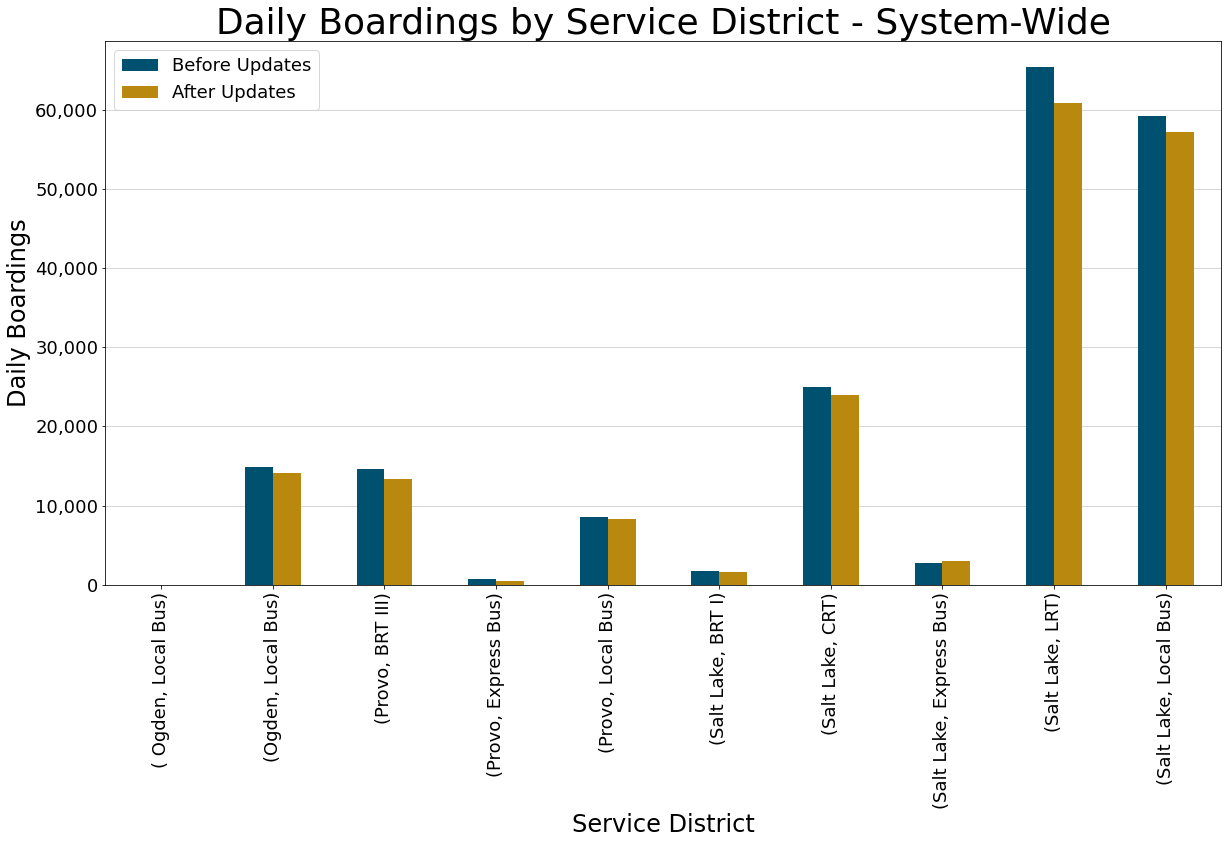

In [33]:
df_Compare_ModeServiceDistrict = df_Compare.groupby(['Service_District','Mode_Name']).agg({sField1: [np.sum], sField2: [np.sum], sFieldDiff: [np.sum]})

#rename columns
df_Compare_ModeServiceDistrict.columns = (sLegend1, sLegend2, sLegendDiff)

df_plot = df_Compare_ModeServiceDistrict[[sLegend1,sLegend2]]

ax = df_plot.plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Service District", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sTitle + " by Service District - System-Wide", fontsize=iTitleSize)

ax.legend([sLegend1,sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#ax.set_ylim([0, 30000])

# BRT/CRT/LRT and Express Bus Daily Boardings by Service District

(0.0, 30000.0)

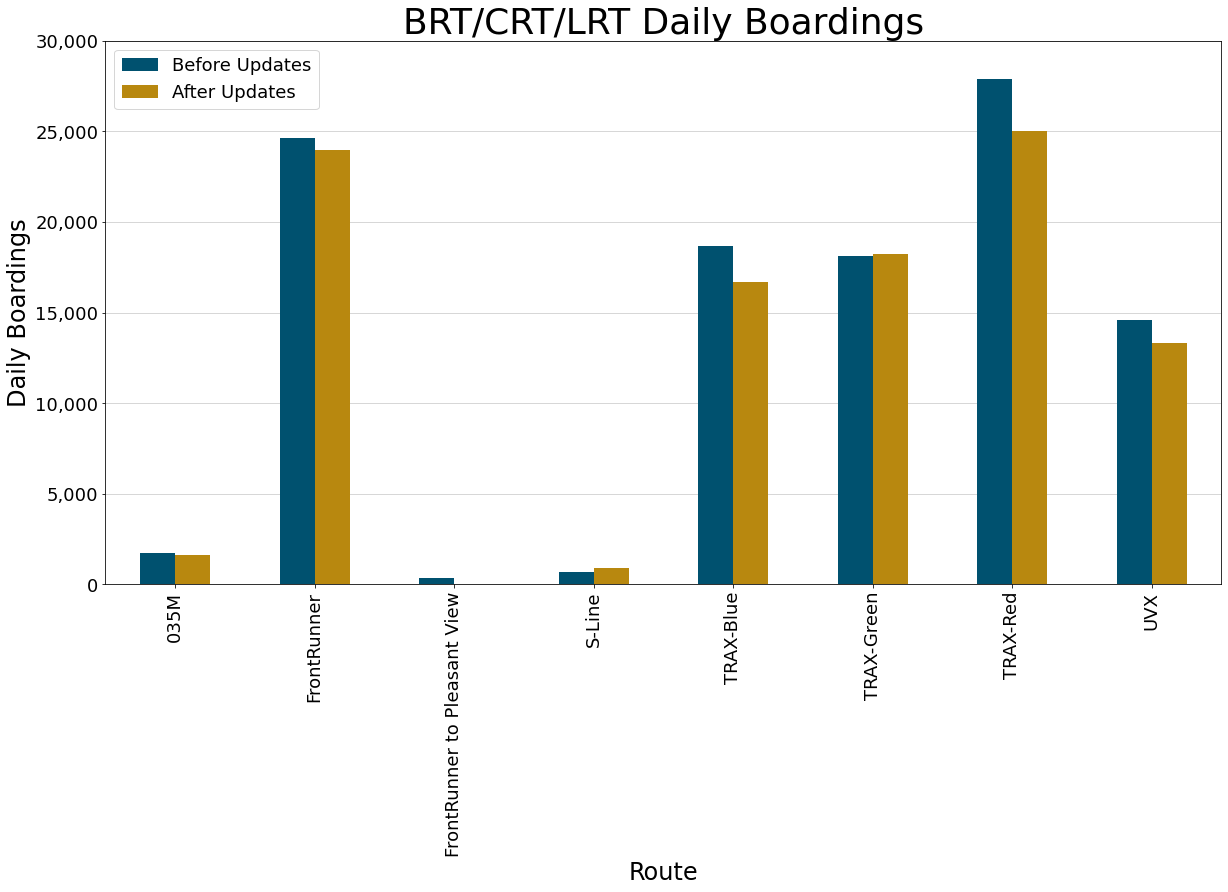

In [34]:
#filter dataframe to plot
df_plot = df_Compare.loc[(df_Compare['Mode_Name'] != "Local Bus") & (df_Compare['Mode_Name'] != "Express Bus")]

ax = df_plot[[sField1,sField2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title("BRT/CRT/LRT " + sTitle, fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 30000])

(0.0, 1000.0)

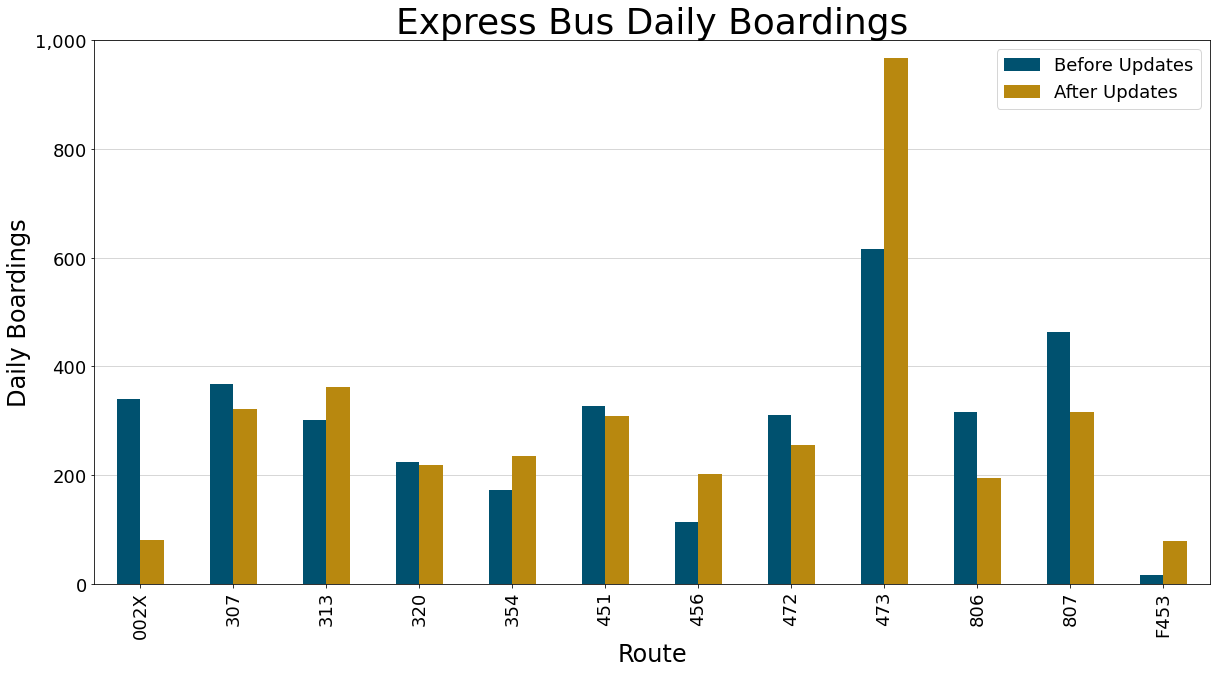

In [35]:
#filter dataframe to plot
df_plot = df_Compare.loc[(df_Compare['Mode_Name'] == "Express Bus")]

ax = df_plot[[sField1,sField2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title("Express Bus " + sTitle, fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 1000])

# Local Bus Daily Boardings by Service District

(0.0, 3500.0)

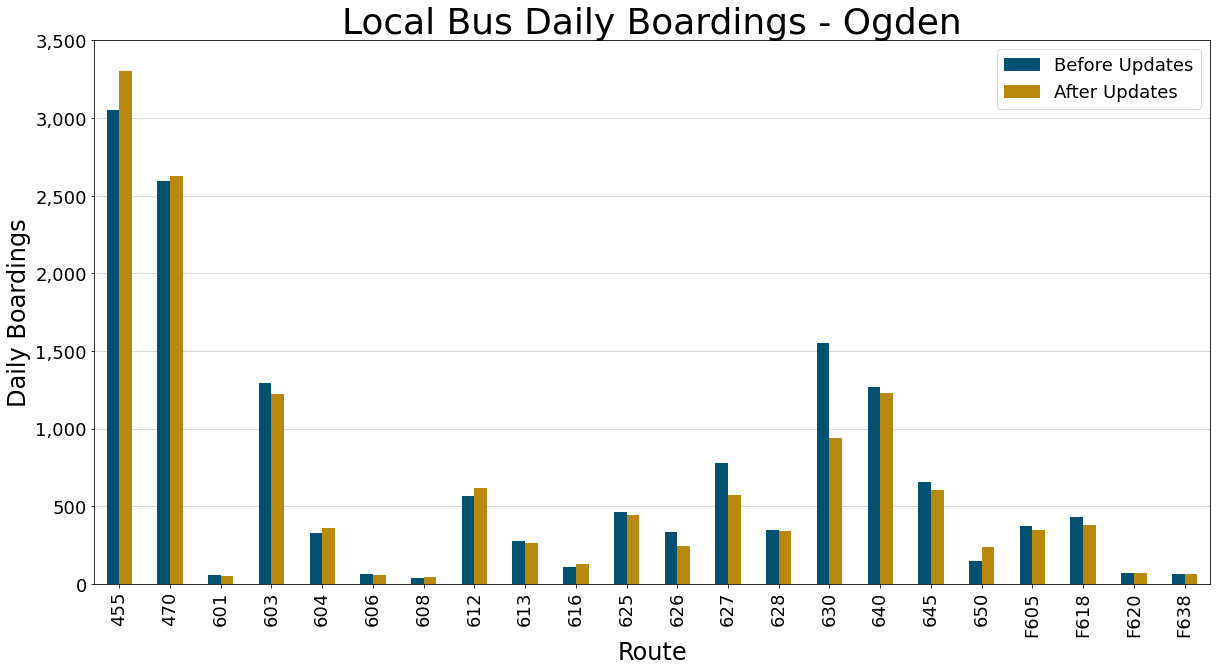

In [36]:
#filter variables
sServiceDistrict = "Ogden"
sModeName = "Local Bus"

#filter dataframe to plot
df_plot = df_Compare.loc[(df_Compare['Mode_Name'] == sModeName) & (df_Compare['Service_District'] == sServiceDistrict)]

ax = df_plot[[sField1,sField2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sModeName + " " + sTitle + " - " + sServiceDistrict, fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 3500])

(0.0, 6000.0)

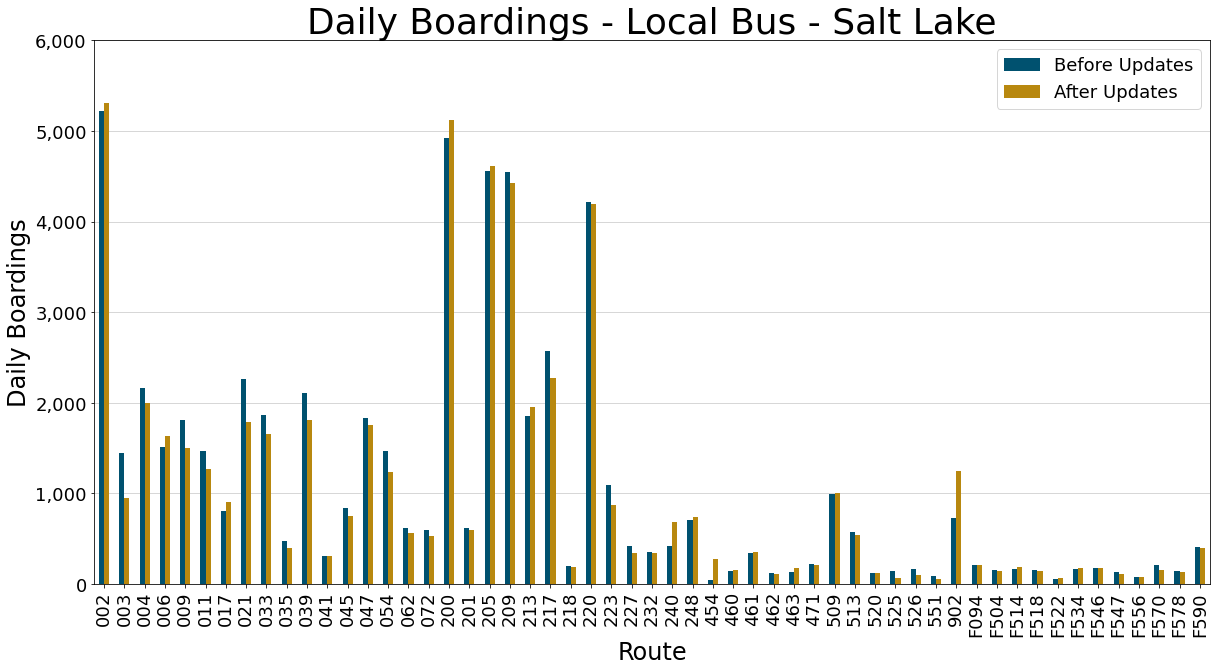

In [37]:
#filter variables
sServiceDistrict = "Salt Lake"
sModeName = "Local Bus"

#filter dataframe to plot
df_plot = df_Compare.loc[(df_Compare['Mode_Name'] == sModeName) & (df_Compare['Service_District'] == sServiceDistrict)]

ax = df_plot[[sField1,sField2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sTitle + " - " + sModeName + " - " + sServiceDistrict, fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 6000])

(0.0, 3000.0)

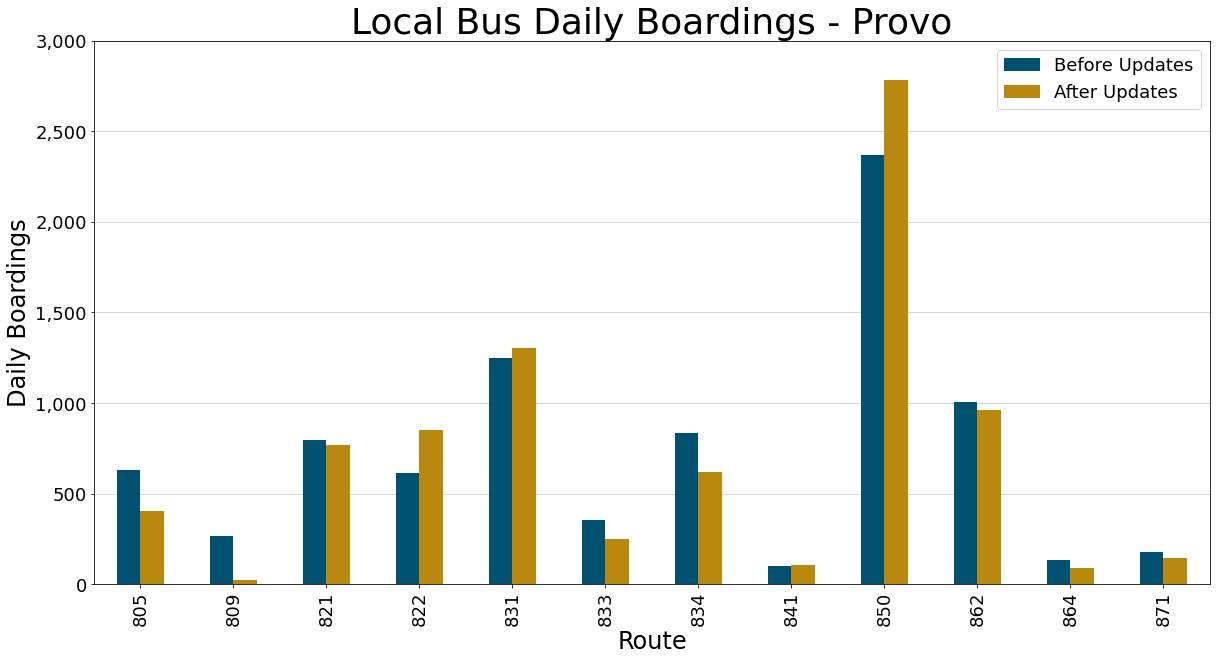

In [38]:
#filter variables
sServiceDistrict = "Provo"
sModeName = "Local Bus"

#filter dataframe to plot
df_plot = df_Compare.loc[(df_Compare['Mode_Name'] == sModeName) & (df_Compare['Service_District'] == sServiceDistrict)]

ax = df_plot[[sField1,sField2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title(sModeName + " " + sTitle + " - " + sServiceDistrict, fontsize=iTitleSize)

ax.legend([sLegend1, sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 3000])

# Compare Daily Walk Boardings TDM1 vs TDM2

In [39]:
sField1 = "DY_W_BOARD_2"
sField2 = "DY_W_BOARD_1"
sFieldDiff = "DY_W_BOARD_Diff"

In [40]:
df_Compare_Mode = df_Compare.groupby(['Mode_Name']).agg({sField1: [np.sum], sField2: [np.sum], sFieldDiff: [np.sum]})

#rename columns
df_Compare_Mode.columns = (sLegend1, sLegend2, sLegendDiff)

#add total row
df_Compare_Mode_wTotal = df_Compare_Mode.append(df_Compare_Mode.sum(numeric_only=True).rename('Total'))
df_Compare_Mode_wTotal.index.name = 'Mode'

#add percent diff
df_Compare_Mode_wTotal[sLegendPercentDiff] = df_Compare_Mode_wTotal[sLegendDiff] / df_Compare_Mode_wTotal[sLegend1]

#add title 
display(Markdown('# Walk Boardings by Mode'))

df_Compare_Mode_wTotal.style.format({sLegend1: "{:,.0f}",sLegend2: "{:,.0f}",sLegendDiff: "{:,.0f}",sLegendPercentDiff: "{:.1%}"})


# Walk Boardings by Mode

,Before Updates,After Updates,Difference,% Difference
Mode,,,,
BRT I,"1,723","1,564",-160,-9.3%
BRT III,"14,291","13,010","-1,281",-9.0%
CRT,"15,947","14,913",-695,-4.4%
Express Bus,"3,017","2,820",-197,-6.5%
LRT,"58,234","54,360","-3,874",-6.7%
Local Bus,"75,630","72,464","-3,166",-4.2%
Total,"168,843","159,131","-9,372",-5.6%


In [41]:
df_WalkBoardings = df_Compare_Mode.copy()
df_WalkBoardings_wTotal = df_Compare_Mode_wTotal.copy()

(0.0, 80000.0)

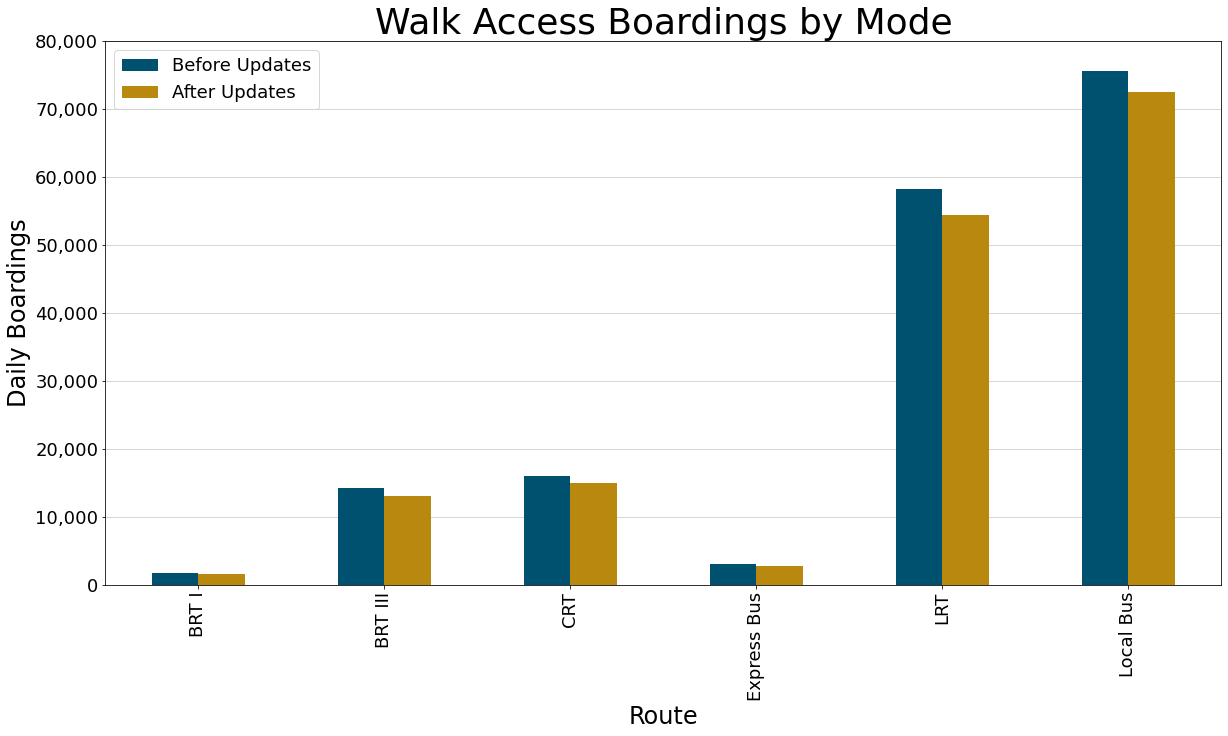

In [42]:
#filter dataframe to plot
df_plot = df_WalkBoardings

ax = df_plot[[sLegend1,sLegend2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title("Walk Access Boardings by Mode", fontsize=iTitleSize)

ax.legend([sLegend1,sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 80000])

# Compare Daily Drive Boardings TDM1 vs TDM2

In [43]:
sField1 = "DY_D_BOARD_2"
sField2 = "DY_D_BOARD_1"
sFieldDiff = "DY_D_BOARD_Diff"

In [44]:
df_Compare_Mode = df_Compare.groupby(['Mode_Name']).agg({sField1: [np.sum], sField2: [np.sum], sFieldDiff: [np.sum]})

#rename columns
df_Compare_Mode.columns = (sLegend1, sLegend2, sLegendDiff)

#add total row
df_Compare_Mode_wTotal = df_Compare_Mode.append(df_Compare_Mode.sum(numeric_only=True).rename('Total'))
df_Compare_Mode_wTotal.index.name = 'Mode'

#add percent diff
df_Compare_Mode_wTotal[sLegendPercentDiff] = df_Compare_Mode_wTotal[sLegendDiff] / df_Compare_Mode_wTotal[sLegend1]

#add title 
display(Markdown('# Drive Boardings by Mode'))

df_Compare_Mode_wTotal.style.format({sLegend1: "{:,.0f}",sLegend2: "{:,.0f}",sLegendDiff: "{:,.0f}",sLegendPercentDiff: "{:.1%}"})


# Drive Boardings by Mode

,Before Updates,After Updates,Difference,% Difference
Mode,,,,
BRT I,33,33,-0,-1.1%
BRT III,285,318,33,11.5%
CRT,"9,037","9,087",57,0.6%
Express Bus,552,722,170,30.9%
LRT,"7,134","6,494",-640,-9.0%
Local Bus,"6,979","7,184",204,2.9%
Total,"24,020","23,837",-176,-0.7%


In [45]:
df_DriveBoardings = df_Compare_Mode.copy()
df_DriveBoardings_wTotal = df_Compare_Mode_wTotal.copy()

(0.0, 10000.0)

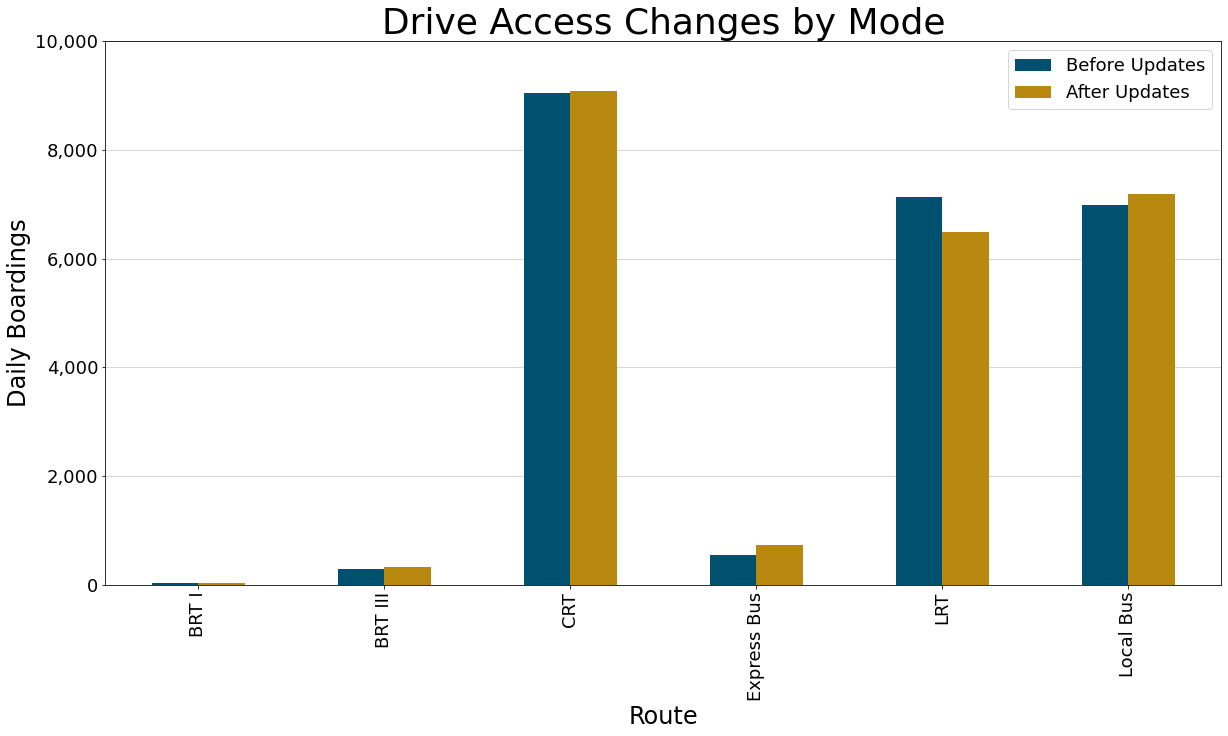

In [46]:
#filter dataframe to plot
df_plot = df_DriveBoardings

ax = df_plot[[sLegend1,sLegend2]].plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color={sColor1, sColor2}, zorder=10)

#set x,y labels
ax.set_xlabel("Route", fontsize=iAxisTitleSize)
ax.set_ylabel("Daily Boardings", fontsize=iAxisTitleSize)

#set title
ax.set_title("Drive Access Changes by Mode", fontsize=iTitleSize)

ax.legend([sLegend1,sLegend2], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylim([0, 10000])

In [47]:
df_WalkDriveCompare = pd.DataFrame.merge(df_WalkBoardings_wTotal,df_DriveBoardings_wTotal,on="Mode",how="inner")

#rename columns
df_WalkDriveCompare.columns = ("Walk " + sLegend1, "Walk " + sLegend2, "Walk " + sLegendDiff, "Walk " + sLegendPercentDiff, "Drive "+ sLegend1 , "Drive "+ sLegend2, "Drive "+ sLegendDiff, "Drive "+ sLegendPercentDiff)

df_WalkDriveCompare.style.format({"Walk " + sLegend1: "{:,.0f}", "Walk " + sLegend2: "{:,.0f}", "Walk " + sLegendDiff: "{:,.0f}", "Walk " + sLegendPercentDiff: "{:.1%}", "Drive "+ sLegend1: "{:,.0f}", "Drive "+ sLegend2: "{:,.0f}", "Drive "+ sLegendDiff: "{:,.0f}", "Drive "+ sLegendPercentDiff: "{:.1%}"})

,Walk Before Updates,Walk After Updates,Walk Difference,Walk % Difference,Drive Before Updates,Drive After Updates,Drive Difference,Drive % Difference
Mode,,,,,,,,
BRT I,"1,723","1,564",-160,-9.3%,33,33,-0,-1.1%
BRT III,"14,291","13,010","-1,281",-9.0%,285,318,33,11.5%
CRT,"15,947","14,913",-695,-4.4%,"9,037","9,087",57,0.6%
Express Bus,"3,017","2,820",-197,-6.5%,552,722,170,30.9%
LRT,"58,234","54,360","-3,874",-6.7%,"7,134","6,494",-640,-9.0%
Local Bus,"75,630","72,464","-3,166",-4.2%,"6,979","7,184",204,2.9%
Total,"168,843","159,131","-9,372",-5.6%,"24,020","23,837",-176,-0.7%


(-0.4, 0.4)

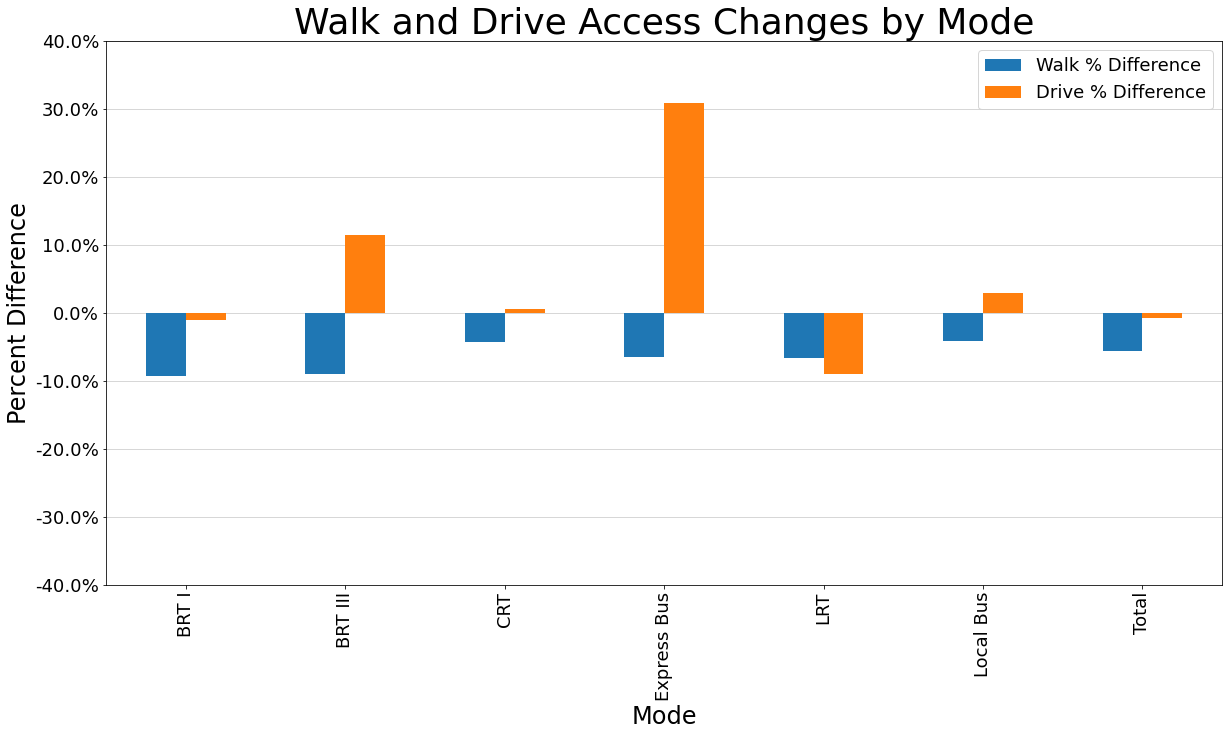

In [48]:
#filter dataframe to plot
df_plot = df_WalkDriveCompare[["Walk " + sLegendPercentDiff,"Drive " + sLegendPercentDiff]]

ax = df_plot.plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize,  zorder=10)

#set x,y labels
ax.set_xlabel("Mode", fontsize=iAxisTitleSize)
ax.set_ylabel("Percent Difference", fontsize=iAxisTitleSize)

#set title
ax.set_title("Walk and Drive Access Changes by Mode", fontsize=iTitleSize)

ax.legend(["Walk " + sLegendPercentDiff, "Drive " + sLegendPercentDiff], prop=dict(size=iLegendSize));

ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.1%}'))

ax.set_ylim([-.4, .4])

# Compare Speed for BRT/CRT/LRT

In [49]:
sField1 = "OK_SPEED_2"
sField2 = "OK_SPEED_1"
sFieldDiff = "OK_SPEED_Diff"

In [50]:
df_Compare

,TDM_Name,DY_BOARD_1,DY_W_BOARD_1,DY_D_BOARD_1,OK_SPEED_1,DY_BOARD_2,DY_W_BOARD_2,DY_D_BOARD_2,OK_SPEED_2,DY_BOARD_Diff,DY_W_BOARD_Diff,DY_D_BOARD_Diff,OK_SPEED_Diff,Route_Num,Mode,Mode_Name,Service_District
Route_Label,,,,,,,,,,,,,,,,,
002,S2,5312.379883,3874.370117,1438.010010,13.700000,5220.430176,3852.149902,1368.280029,13.700000,91.949707,22.220215,69.729981,0.000000,2,4,Local Bus,Salt Lake
002X,S2X,80.599998,65.040001,15.560000,13.900000,340.049988,231.339996,108.709999,13.800000,-259.449989,-166.299995,-93.149999,0.099999,2X,6,Express Bus,Salt Lake
003,S3,953.419983,800.450012,152.970001,14.800000,1449.619995,1225.219971,224.399994,14.800000,-496.200012,-424.769958,-71.429993,0.000000,3,4,Local Bus,Salt Lake
004,S4,2003.150024,1952.239990,50.910000,17.700001,2168.530029,2117.189941,51.340000,17.400000,-165.380005,-164.949951,-0.430000,0.300001,4,4,Local Bus,Salt Lake
006,S6,1630.290039,1361.829956,268.459992,14.800000,1510.949951,1246.650024,264.299988,14.800000,119.340088,115.179932,4.160004,0.000000,6,4,Local Bus,Salt Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S-Line,Sline,879.030029,869.380005,9.650000,11.800000,672.760010,672.219971,0.540000,13.800000,206.270019,197.160034,9.110000,-2.000000,720,7,LRT,Salt Lake
TRAX-Blue,Blue,16681.279297,14344.339844,2336.939941,22.400000,18669.810547,15983.240234,2686.570068,24.400000,-1988.531250,-1638.900391,-349.630127,-2.000000,701,7,LRT,Salt Lake
TRAX-Green,Green,18260.259766,17032.849609,1227.410034,18.600000,18109.289062,16981.619141,1127.670044,19.200001,150.970703,51.230469,99.739990,-0.600000,704,7,LRT,Salt Lake


In [51]:
df_Compare_BRTCRTLRT = df_Compare.loc[(df_Compare['Mode_Name'] != "Local Bus") & (df_Compare['Mode_Name'] != "Express Bus")]

df_Compare_Speed = df_Compare_BRTCRTLRT[[sField1,sField2,sFieldDiff]]

#rename columns
df_Compare_Speed.columns = (sLegend1, sLegend2, sLegendDiff)

#add percent diff
df_Compare_Speed[sLegendPercentDiff] = df_Compare_Speed[sLegendDiff] / df_Compare_Speed[sLegend1]

#add title 
display(Markdown('# Off-Peak Speed Differences for BRT/LRT/CRT Routes'))

df_Compare_Speed.style.format({sLegend1: "{:,.1f}",sLegend2: "{:,.1f}",sLegendDiff: "{:,.1f}",sLegendPercentDiff: "{:.1%}"})


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Off-Peak Speed Differences for BRT/LRT/CRT Routes

,Before Updates,After Updates,Difference,% Difference
Route_Label,,,,
035M,21.5,21.5,0.0,0.0%
FrontRunner,40.6,40.6,0.0,0.0%
FrontRunner to Pleasant View,41.0,nan,nan,nan%
S-Line,13.8,11.8,-2.0,-14.5%
TRAX-Blue,24.4,22.4,-2.0,-8.2%
TRAX-Green,19.2,18.6,-0.6,-3.1%
TRAX-Red,24.4,23.6,-0.8,-3.3%
UVX,16.2,16.8,0.6,3.7%
